In [2]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud

  Using cached wordcloud-1.9.2.tar.gz (222 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp310-cp310-macosx_11_0_arm64.whl size=152699 sha256=e0050504255b94900a94293b98060d82d2be3006531fcfabcb2c5e23cffb0427
  Stored in directory: /Users/imimsk/Library/Caches/pip/wheels/56/72/cc/86d8dbd1e3a8ef5470177cf6a4d25ec3cbebac55402e0ff4f0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Layers
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense, Dropout

In [10]:
# Importing data
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Delete column 
df = df.drop('Unnamed: 2', axis=1)
df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 4', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
#change column name
df.rename(columns={'v1': 'type', 'v2': 'text'}, inplace=True)

print(df)

      type                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


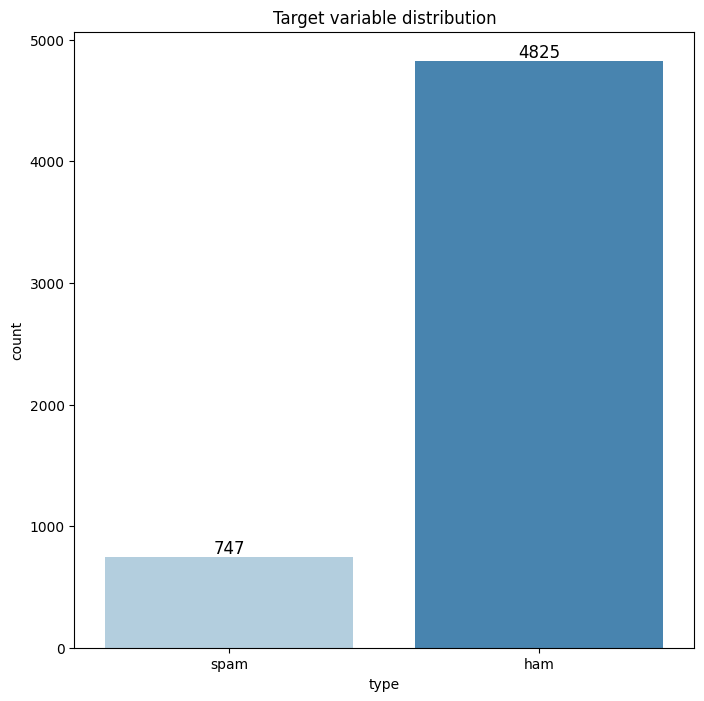

In [14]:
# Plotting a class distribution barplot
class_distribution = df['type'].value_counts().sort_index(ascending = False)
plt.figure(figsize=(8,8))
ax = sns.countplot(x='type', data=df, order = class_distribution.index, palette="Blues")
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize = 12)
plt.title('Target variable distribution')
plt.show()

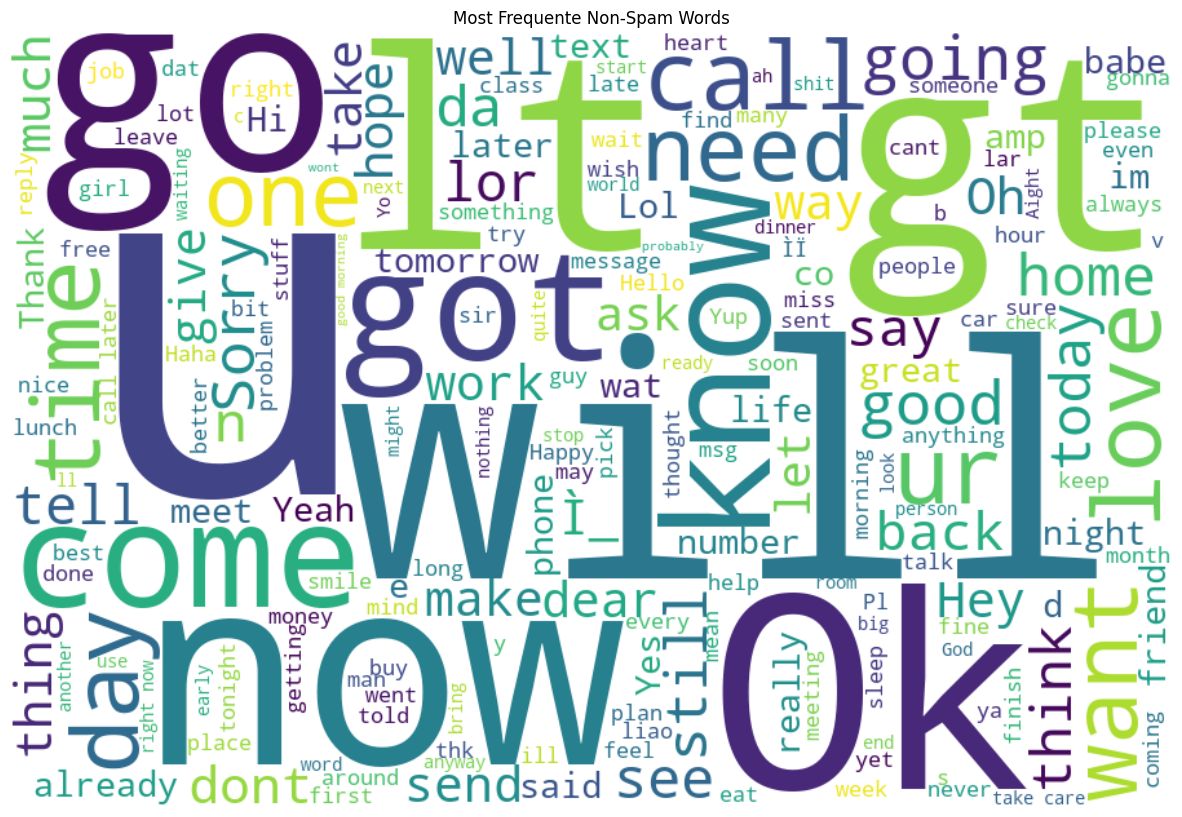

In [15]:
# Plotting word cloud for ham messages
ham = " ".join(df[df['type'] == 'ham']['text'])
wordcloud = WordCloud(width = 900, height = 600, max_words = 200, background_color ='white').generate(ham)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Frequente Non-Spam Words")
plt.show()

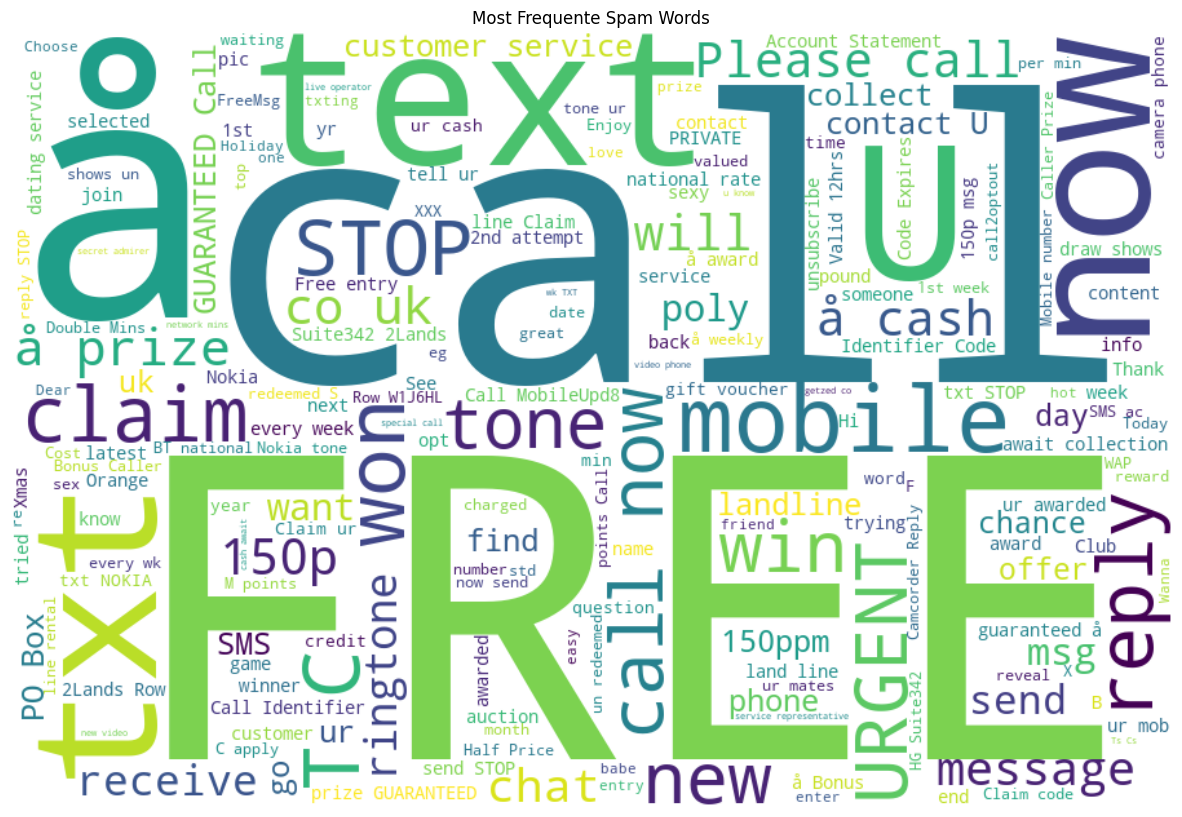

In [16]:
# Plotting word cloud form spam messages 
spam = " ".join(df[df['type'] == 'spam']['text'])
wordcloud = WordCloud(width = 900, height = 600, max_words = 200, background_color ='white').generate(spam)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Frequente Spam Words")
plt.show()

In [17]:
# Data pre processing
# Creating a function to clean text data
def text_cleaning(text):
    # Removing punctuation 
    text = re.sub(r'[^\w\s]', '', text)
    # Converting text to lowercase
    text = text.lower()
    # Removing digits
    text = re.sub(r'\d+','',text)
    # Removing stopwords that are common in the English language
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in stop])
    # Lemmatizing text
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    # Removing white spaces
    text = text.strip()
    
    return text

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imimsk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/imimsk/nltk_data...


True

In [22]:
# Splitting training and testing sets
X_train, X_test, y_train,y_test = train_test_split(df['text'], df['type'], test_size = 0.4, random_state = 123)

# Applying text_cleaning function
X_train = X_train.apply(text_cleaning)
X_test = X_test.apply(text_cleaning)

In [23]:
# Displaying text after cleansing 
X_train

73                               kkwhere youhow performed
2948                            bruce b down amp fletcher
1000                                  nobut heard abt tat
3993               love cuddle want hold strong arm right
4197    want funk ur fone weekly new tone reply tonesu...
                              ...                        
5218                     accidentally brought em home box
4060    aight ive set free think could text blake addr...
1346    ok stay night xavier sleeping bag im getting t...
3454    need lar jus testing e phone card dunno networ...
3582                         sent maga money yesterday oh
Name: text, Length: 3343, dtype: object

In [24]:
# Data tokenization and padding 
max_lenght = max([len(i) for i in X_train])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_lenght)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_lenght)

In [25]:
# SMOTE to balance dataset
# Fixing class imbalance with SMOTE
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [26]:
# Counting values after SMOTE
y_train.value_counts()

type
ham     2884
spam    2884
Name: count, dtype: int64

In [27]:
# Encoding target variable 
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [28]:
# Defining LSTM model structure
model = Sequential()
# Adding embedding layer to convert input data into a dense vector representation
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim = 100, input_length = max_lenght))
# Adding LSTM layers 
model.add(LSTM(units=64, return_sequences = True))
model.add(LSTM(units=64))
# Adding a Dense Layer
model.add(Dense(units=64, activation = 'relu'))
# Adding a Dropout layer, in order to prevent overfitting
model.add(Dropout(rate=0.5))
# Adding an output Dense layer
model.add(Dense(units=1, activation = 'sigmoid'))
model

In [29]:
# Visualizing model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 419, 100)          596500    
                                                                 
 lstm (LSTM)                 (None, 419, 64)           42240     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 675989 (2.58 MB)
Trainable params: 675989 

In [30]:
# Defining an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

In [31]:
# Compiling model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
# Fitting model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.3, callbacks =[early_stopping])

Epoch 1/10
127/127 [==============================] - 33s 248ms/step - loss: 0.3799 - accuracy: 0.8271 - val_loss: 0.8758 - val_accuracy: 0.5765
Epoch 2/10
127/127 [==============================] - 32s 253ms/step - loss: 0.1562 - accuracy: 0.9495 - val_loss: 0.7135 - val_accuracy: 0.7683
Epoch 3/10
127/127 [==============================] - 31s 242ms/step - loss: 0.0820 - accuracy: 0.9765 - val_loss: 0.9153 - val_accuracy: 0.7169
Epoch 4/10
127/127 [==============================] - 31s 243ms/step - loss: 0.0453 - accuracy: 0.9886 - val_loss: 1.2213 - val_accuracy: 0.6464
Epoch 5/10
127/127 [==============================] - 31s 243ms/step - loss: 0.0351 - accuracy: 0.9908 - val_loss: 1.5836 - val_accuracy: 0.6355
Epoch 6/10
127/127 [==============================] - 31s 243ms/step - loss: 0.0244 - accuracy: 0.9938 - val_loss: 1.4234 - val_accuracy: 0.6834
Epoch 7/10
127/127 [==============================] - 32s 251ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 2.2475 - val_ac

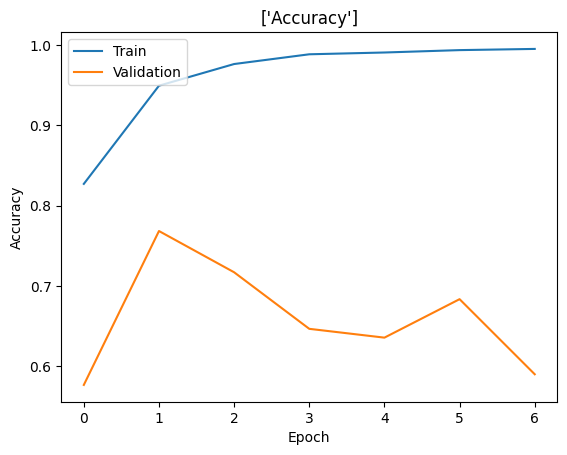

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(['Accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

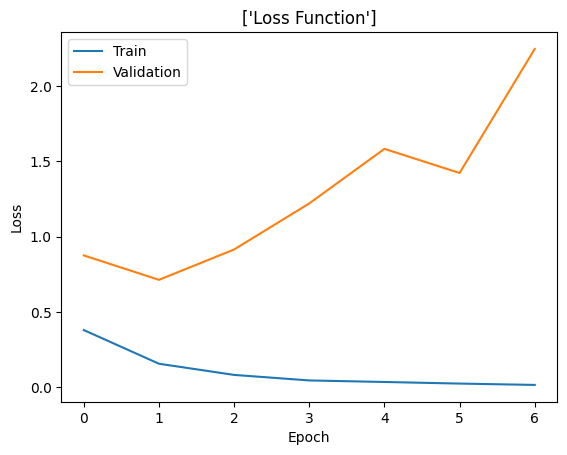

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(['Loss Function'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [34]:
# Running model on testing set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

70/70 [==============================] - 4s 60ms/step


Accuracy: 0.9668012561686855
Precision: 0.8386075949367089
Recall: 0.9201388888888888
F1 Score: 0.8774834437086093


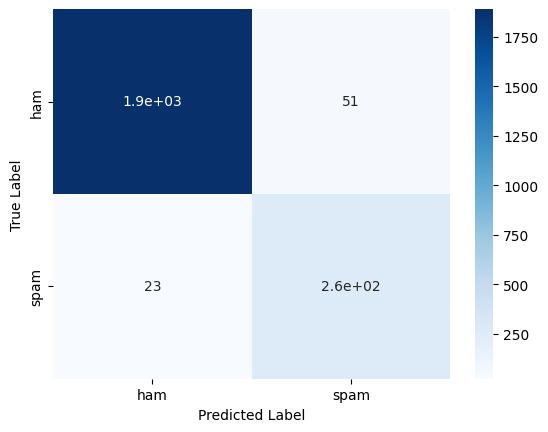

In [35]:
# Printing metric scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred).astype(int)
sns.heatmap(cm, annot=True, cmap='Blues',
xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
# Counting total values for ham messages (0) and spam messages (1) on testing set
from numpy import unique
value_counts = dict(zip(*np.unique(y_test, return_counts=True)))
print(value_counts)

{0: 1941, 1: 288}


In [37]:
# Printing accuracy on testing set
correct = np.count_nonzero(y_pred == y_test)
wrong = np.count_nonzero(y_pred != y_test)

print("The model predicted correctly",correct,"messages")
print("The model predicted incorrectly",wrong,"messages")

The model predicted correctly 3804141 messages
The model predicted incorrectly 1164300 messages
